## Libraries

In [1]:
!pip install MFDFA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --force-reinstall git+https://github.com/rsautter/Chi-Space

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rsautter/Chi-Space to /tmp/pip-req-build-b1p6kh1z
  Running command git clone -q https://github.com/rsautter/Chi-Space /tmp/pip-req-build-b1p6kh1z
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for Chi-Space: filename=Chi_Space-0.2-py3-none-any.whl size=11040 sha256=a10114ce3808deafb7b9e1e06c61bfc6e10643ba17c08ea5e8fb48eef04b9f3a
  Stored in directory: /tmp/pip-ephem-wheel-cache-84min2uw/wheels/11/52/c8/03ed706750385b25afa569b1e10c2025b8705d8eacf48e5f79
Successfully built Chi-Space


In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import chi
from scipy import stats

## Downloading Real Data

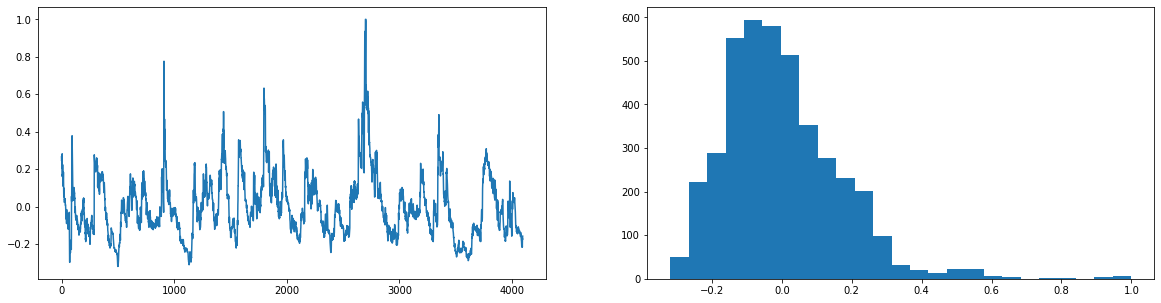

In [ ]:
sw4096 = chi.get_SolarWind()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(sw4096)
plt.subplot(1,2,2)
plt.hist(sw4096,bins=25)
plt.show()

0.9332529647314404


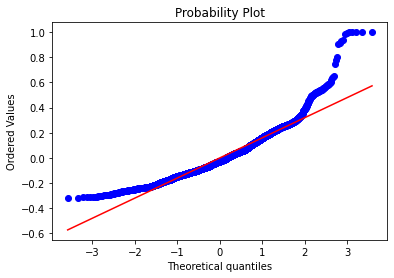

In [ ]:
ax = plt.subplot()
(quantiles, ordered_values), (slope, clin, sCoefficientDetermination) =  stats.probplot(sw4096,plot=ax)
print(sCoefficientDetermination**2)
plt.show()

In [ ]:
swc = chi.chiSpace(sw4096)

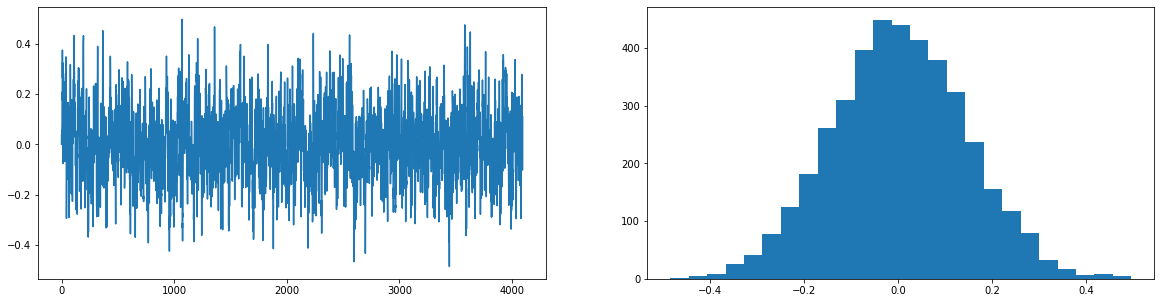

In [ ]:
sw4096_s = chi.get_SurrogateSolarWind()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(sw4096_s)
plt.subplot(1,2,2)
plt.hist(sw4096_s,bins=25)
plt.show()

0.9997351271589228


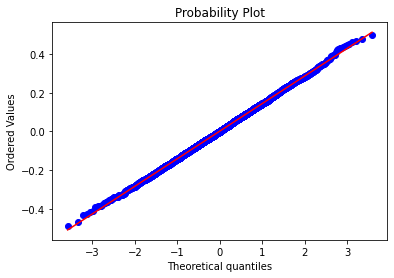

In [ ]:
ax = plt.subplot()
(quantiles, ordered_values), (slope, clin, sCoefficientDetermination) =  stats.probplot(sw4096_s,plot=ax)
print(sCoefficientDetermination**2)
plt.show()

In [ ]:
swc_s = chi.chiSpace(sw4096_s)

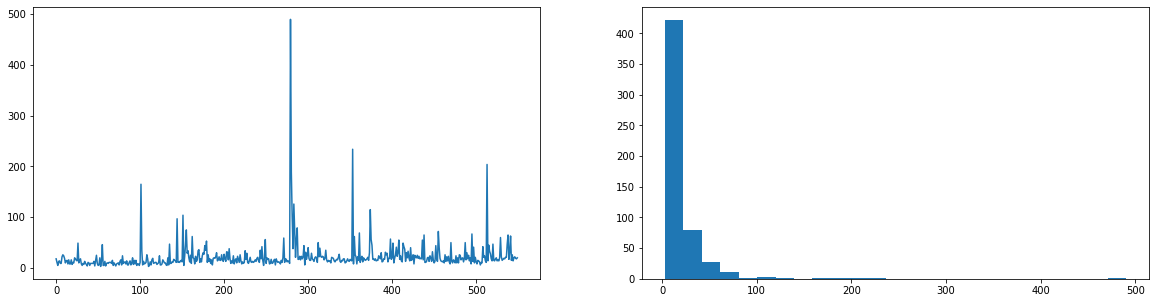

In [4]:
def get_WikiTraffic(index=0):
	'''
	The first 100 rows were selected
	
	Source:
		https://www.kaggle.com/competitions/web-traffic-time-series-forecasting/overview
	'''
	return pd.read_csv(r'wikipediaWebTraffic.csv').iloc[index].values[1:]

wiki = chi.get_WikiTraffic()[1:].astype(float)

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(wiki)
plt.subplot(1,2,2)
plt.hist(wiki,bins=25)
plt.show()

In [ ]:
wiki_chi = chi.chiSpace(wiki)

0.37159217067337036


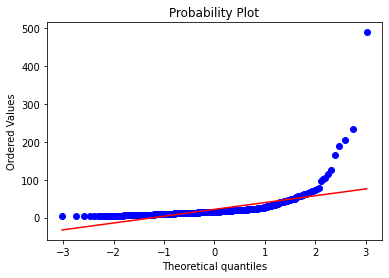

In [ ]:
plt.figure()
ax = plt.subplot()
(quantiles, ordered_values), (slope, clin, sCoefficientDetermination) =  stats.probplot(wiki,plot=ax)
print(sCoefficientDetermination**2)
plt.show()

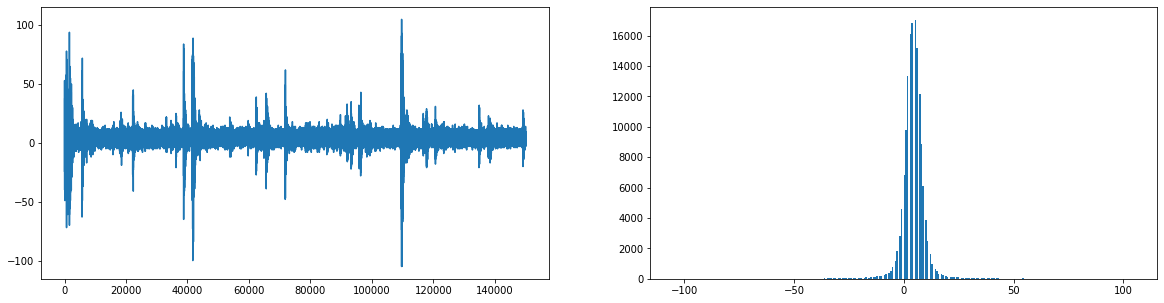

In [8]:
def get_Acoustic1():
	'''
	Source:
		https://www.kaggle.com/competitions/LANL-Earthquake-Prediction/overview
	'''
	return pd.read_csv(r'seg_1b1ad8.csv')["acoustic_data"].values

ac1 = get_Acoustic1()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ac1)
plt.subplot(1,2,2)
plt.hist(ac1,bins=300)
plt.show()

In [ ]:
lanl1 = chi.chiSpace(ac1)

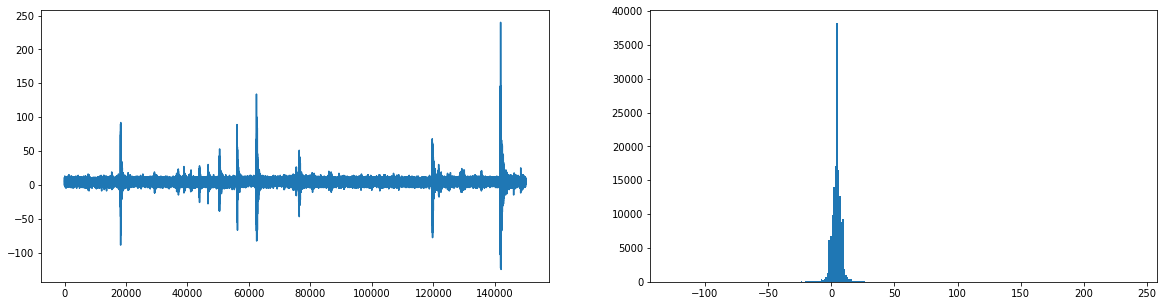

In [9]:

def get_Acoustic2():
	'''
	Source:
		https://www.kaggle.com/competitions/LANL-Earthquake-Prediction/overview
	'''
	return pd.read_csv(r'seg_1bd38e.csv')["acoustic_data"].values

ac2 = chi.get_Acoustic2()
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ac2)
plt.subplot(1,2,2)
plt.hist(ac2,bins=300)
plt.show()

In [ ]:
lanl2 = chi.chiSpace(ac2)

## Full time-series plot

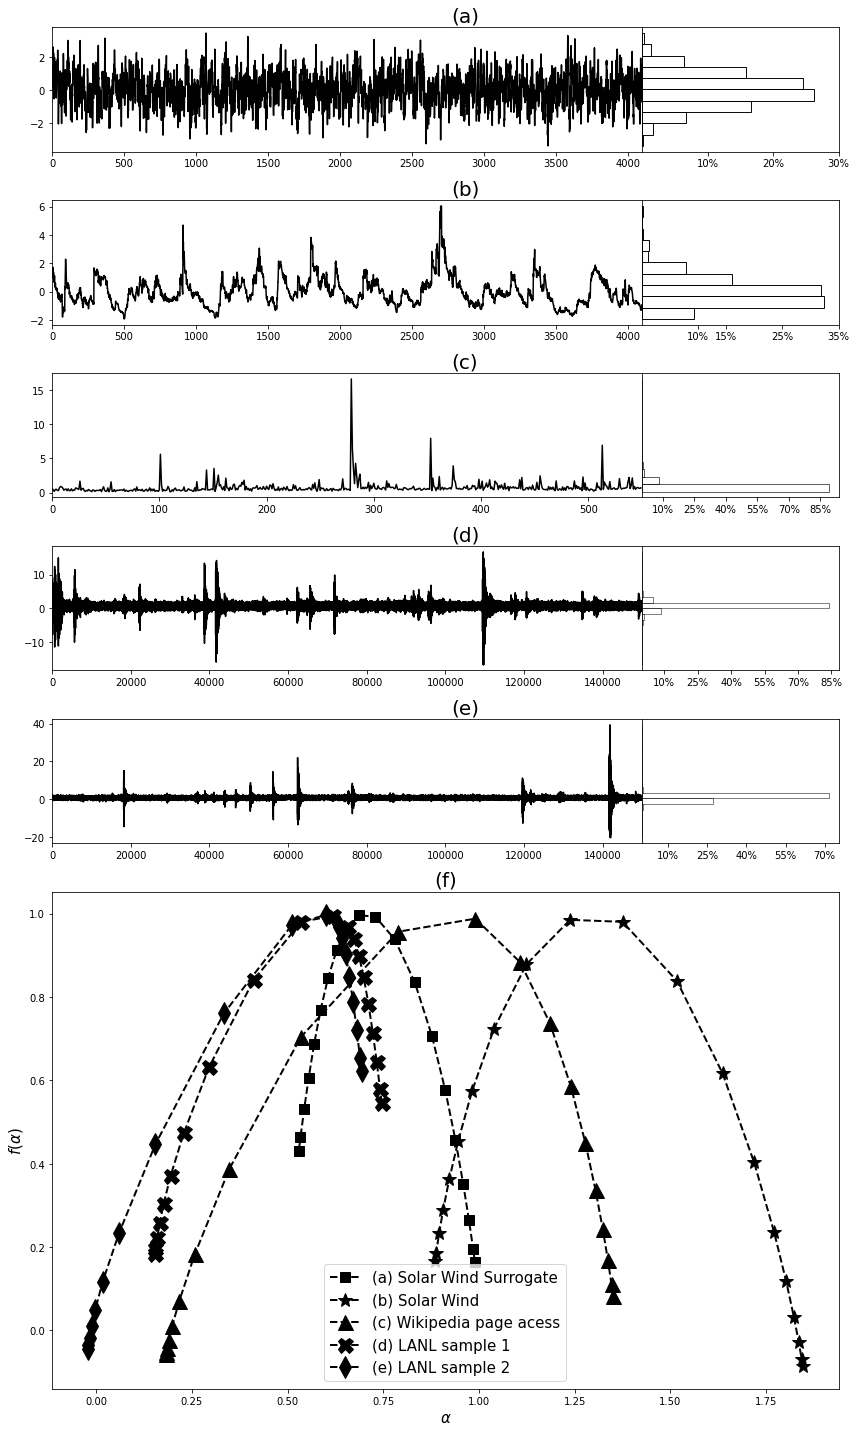

In [ ]:
gs = GridSpec(6,2,height_ratios=[1,1,1,1,1,4],wspace=0.0,width_ratios=[3,1])

plt.figure(figsize=(12,20))

################################################################################
plt.subplot(gs[0,0])
plt.title("(a)",fontsize=20,x=0.7)
plt.plot(sw4096_s/np.std(sw4096_s),color='k')
plt.xlim(0,len(sw4096_s))
#plt.xlabel("Time")

plt.subplot(gs[0,1])
ds = pd.DataFrame({'y':sw4096_s/np.std(sw4096_s)})
sns.histplot(ds,y='y',color='k',bins=10,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.20,0.30],["10%","20%","30%"])

################################################################################
plt.subplot(gs[1,0])
plt.title("(b)",fontsize=20,x=0.7)
plt.plot(sw4096/np.std(sw4096),color='k')
plt.xlim(0,len(sw4096))
#plt.xlabel("Time")

plt.subplot(gs[1,1])
ds = pd.DataFrame({'y':sw4096/np.std(sw4096)})
sns.histplot(ds,y='y',color='k',bins=10,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.15,0.25,0.35],["10%","15%","25%","35%"])
################################################################################
plt.subplot(gs[2,0])
plt.title("(c)",fontsize=20,x=0.7)
plt.plot(wiki/np.std(wiki),color='k')
plt.xlim(0,len(wiki))
#plt.xlabel("Time")

plt.subplot(gs[2,1])
ds = pd.DataFrame({'y':wiki/np.std(wiki)})
sns.histplot(ds,y='y',color='k',bins=15,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.25,0.4,0.55,0.7,0.85],["10%","25%","40%","55%","70%","85%"])
################################################################################

plt.subplot(gs[3,0])
plt.title("(d)",fontsize=20,x=0.7)
plt.plot(ac1/np.std(ac1),color='k')
plt.xlim(0,len(ac2))
#plt.xlabel("Time")

plt.subplot(gs[3,1])
ds = pd.DataFrame({'y':ac1/np.std(ac1)})
sns.histplot(ds,y='y',color='k',bins=20,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.25,0.4,0.55,0.7,0.85],["10%","25%","40%","55%","70%","85%"])
################################################################################

plt.subplot(gs[4,0])
plt.title("(e)",fontsize=20,x=0.7)
plt.plot(ac2/np.std(ac2),color='k')
plt.xlim(0,len(ac2))
#plt.xlabel("Time")

plt.subplot(gs[4,1])
ds = pd.DataFrame({'y':ac2/np.std(ac2)})
sns.histplot(ds,y='y',color='k',bins=20,stat="probability",fill=False)
plt.ylabel('')
plt.yticks([])
plt.xlabel('')
plt.xticks([0.1,0.25,0.4,0.55,0.7],["10%","25%","40%","55%","70%"])
################################################################################

plt.subplot(gs[5,:])
plt.title("(f)",fontsize=20)

a, fa =chi.getAverageSing(sw4096_s/np.std(sw4096_s))
plt.plot(a,fa, lw=2, color='k',marker='s',markersize=10,ls='--',label="(a) Solar Wind Surrogate")
plt.xlabel(r"$\alpha$",fontsize=15)
plt.ylabel(r"$f(\alpha)$",fontsize=15)

xa, xfa =chi.getAverageSing(sw4096/np.std(sw4096))
plt.plot(xa,xfa, lw=2, color='k',marker='*',markersize=15,ls='--',label="(b) Solar Wind")

xa, xfa =chi.getAverageSing(wiki/np.std(wiki))
plt.plot(xa,xfa, lw=2, color='k',marker='^',markersize=15,ls='--',label="(c) Wikipedia page acess")

xa, xfa =chi.getAverageSing(ac1/np.std(ac1))
plt.plot(xa,xfa, lw=2, color='k',marker='X',markersize=15,ls='--',label="(d) LANL sample 1")

xa, xfa =chi.getAverageSing(ac2/np.std(ac2))
plt.plot(xa,xfa, lw=2, color='k',marker='d',markersize=15,ls='--',label="(e) LANL sample 2")

leg = plt.legend(fontsize = 15)
for l in leg.legendHandles:
  l._sizes = [10]
plt.tight_layout()
plt.savefig("timeseries.png",dpi=200,bbox_inches='tight')
plt.show()

# $χ$-Space plot

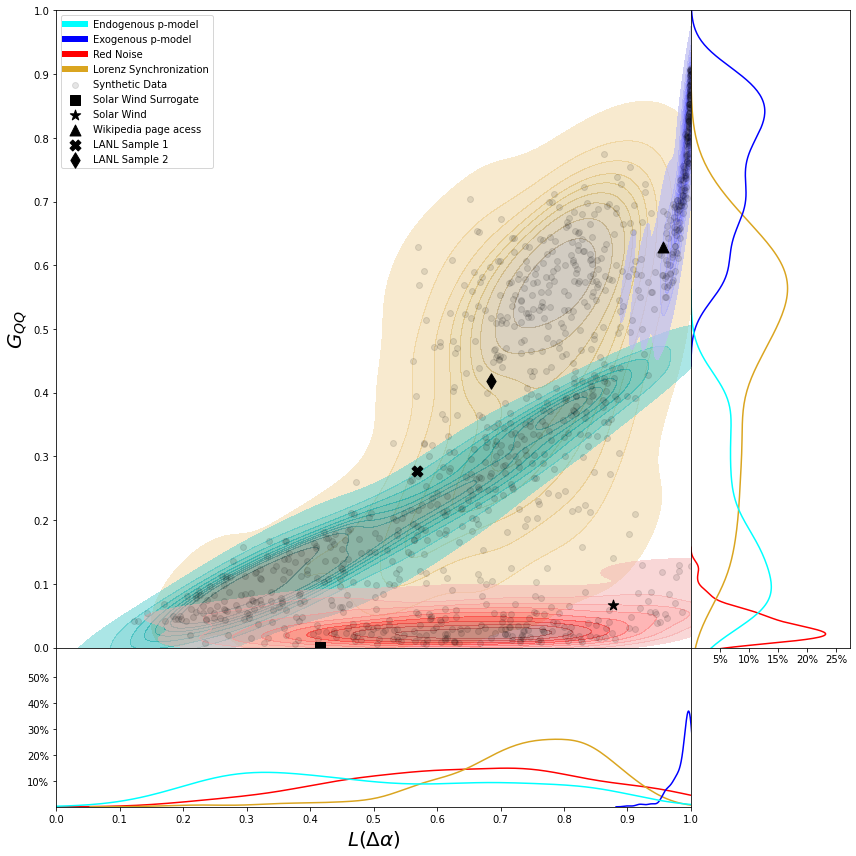

In [ ]:
gs,[h,l] = chi.plot()

#https://matplotlib.org/stable/api/markers_api.html
ax = plt.subplot(gs[0,0])

fdata = pd.concat([chi.get_endoDataResults(),chi.get_exoDataResults(),chi.get_LorenzDataResults(), chi.get_redsDataResults()])
sc = plt.scatter(fdata['LDA'],fdata['GQQ'],color='k',alpha=0.1)
h.append(sc)
l.append("Synthetic Data")



h2 = plt.scatter(swc_s["LDA"],swc_s["GQQ"],s=120,color='k',marker='s')
h.append(h2)
l.append("Solar Wind Surrogate")

h1 = plt.scatter(swc["LDA"],swc["GQQ"],s=120,color='k',marker='*')
h.append(h1)
l.append("Solar Wind")



h1 = plt.scatter(wiki_chi["LDA"],wiki_chi["GQQ"],s=120,color='k',marker='^')
h.append(h1)
l.append("Wikipedia page acess")
^

h3 = plt.scatter(lanl1["LDA"],lanl1["GQQ"],s=120,color='k',marker="X")
h.append(h3)
l.append("LANL Sample 1")

h3 = plt.scatter(lanl2["LDA"],lanl2["GQQ"],s=120,color='k',marker='d')
h.append(h3)
l.append("LANL Sample 2")

plt.legend(h,l,loc=2)
plt.savefig("chiSpace.png",dpi=300)
plt.show()